# Lab Assignment 1

## Implement Perceptron Learning Algorithm (PLA)

Code the perceptron learning algorithm for OR, NOT, and AND gates using Python. Show the weights after each update. Plot the decision boundary after each weight update using Python built-in packages. (K4)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def bias_add(X: np.ndarray) -> np.ndarray:
    return np.hstack([np.ones((X.shape[0], 1)), X])

In [ ]:
def to_2d(X: np.ndarray) -> np.ndarray:
    if X.shape[1] == 1:
        return np.hstack([X, np.zeros((X.shape[0], 1))])
    return X

In [ ]:
def predict_label(w: np.ndarray, x_aug: np.ndarray) -> int:
    return 1 if np.dot(w, x_aug) >= 0 else 0

In [ ]:
def plot_decision_boundary(ax, X2d, y, w, title):
    class0 = y == 0
    class1 = y == 1
    ax.scatter(X2d[class0, 0], X2d[class0, 1], marker='o', label='Class 0')
    ax.scatter(X2d[class1, 0], X2d[class1, 1], marker='s', label='Class 1')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_title(title)

    w0, w1, w2 = w
    if np.isclose(w2, 0.0):
        if not np.isclose(w1, 0.0):
            x_vert = -w0 / w1
            ax.axvline(x=x_vert, linestyle='--', label='Decision Boundary')
    else:
        xs = np.linspace(-0.5, 1.5, 100)
        ys = -(w0 + w1 * xs) / w2
        ax.plot(xs, ys, '--', label='Decision Boundary')

    ax.legend()

In [ ]:
class Perceptron:
    def __init__(self, lr=1.0, n_epochs=10, random_state=42, verbose=True):
        self.lr = lr
        self.n_epochs = n_epochs
        self.rng = np.random.RandomState(random_state)
        self.verbose = verbose
        self.w = None
        self.update_steps = 0
        self.snapshots = []
        self.figures = []

    def fit(self, X: np.ndarray, y: np.ndarray, gate_name: str):
        X2d = to_2d(X)
        X_aug = bias_add(X2d)

        self.w = self.rng.uniform(-0.5, 0.5, size=(X2d.shape[1] + 1,))
        if self.verbose:
            print(f"[{gate_name}] Initial weights: {self.w}")

        self.update_steps = 0
        self.snapshots = []

        for epoch in range(1, self.n_epochs + 1):
            error_count = 0
            for i, (xi_aug, target) in enumerate(zip(X_aug, y)):
                y_pred = predict_label(self.w, xi_aug)
                update = self.lr * (target - y_pred)
                if update != 0:
                    self.w += update * xi_aug
                    self.update_steps += 1
                    error_count += 1

                    if self.verbose:
                        print(
                            f"[{gate_name}] Epoch {epoch:02d}, sample {i}, "
                            f"y_true={target}, y_pred={y_pred}, update={update}, "
                            f"new_w={self.w}"
                        )

                    # store snapshot
                    self.snapshots.append({
                        "w": self.w.copy(),
                        "epoch": epoch,
                        "step": self.update_steps
                    })

            if error_count == 0:
                if self.verbose:
                    print(f"[{gate_name}] Converged at epoch {epoch}. Final weights: {self.w}\n")
                break

        self.X2d_ = X2d
        self.y_ = y
        return self.w

In [ ]:
def get_gate_data(gate: str):
    gate = gate.upper()
    if gate == "AND":
        X = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
        y = np.array([0, 0, 0, 1])
    elif gate == "OR":
        X = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])
        y = np.array([0, 1, 1, 1])
    elif gate == "NOT":
        X = np.array([[0],
                      [1]])
        y = np.array([1, 0])
    return X, y

In [ ]:
gates = ["AND", "OR", "NOT"]
lr = 1.0
n_epochs = 50

[AND] Initial weights: [-0.12545988  0.45071431  0.23199394]
[AND] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  0.45071431 -0.76800606]
[AND] Epoch 01, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-0.12545988  1.45071431  0.23199394]
[AND] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  1.45071431 -0.76800606]
[AND] Epoch 02, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431 -0.76800606]
[AND] Epoch 02, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  0.23199394]
[AND] Epoch 03, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431  0.23199394]
[AND] Epoch 03, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  1.23199394]
[AND] Epoch 04, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  1.45071431  0.23199394]
[AND] Epoch 04, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  2.45071431  1.23199394]
[AND] Epoch 05, 

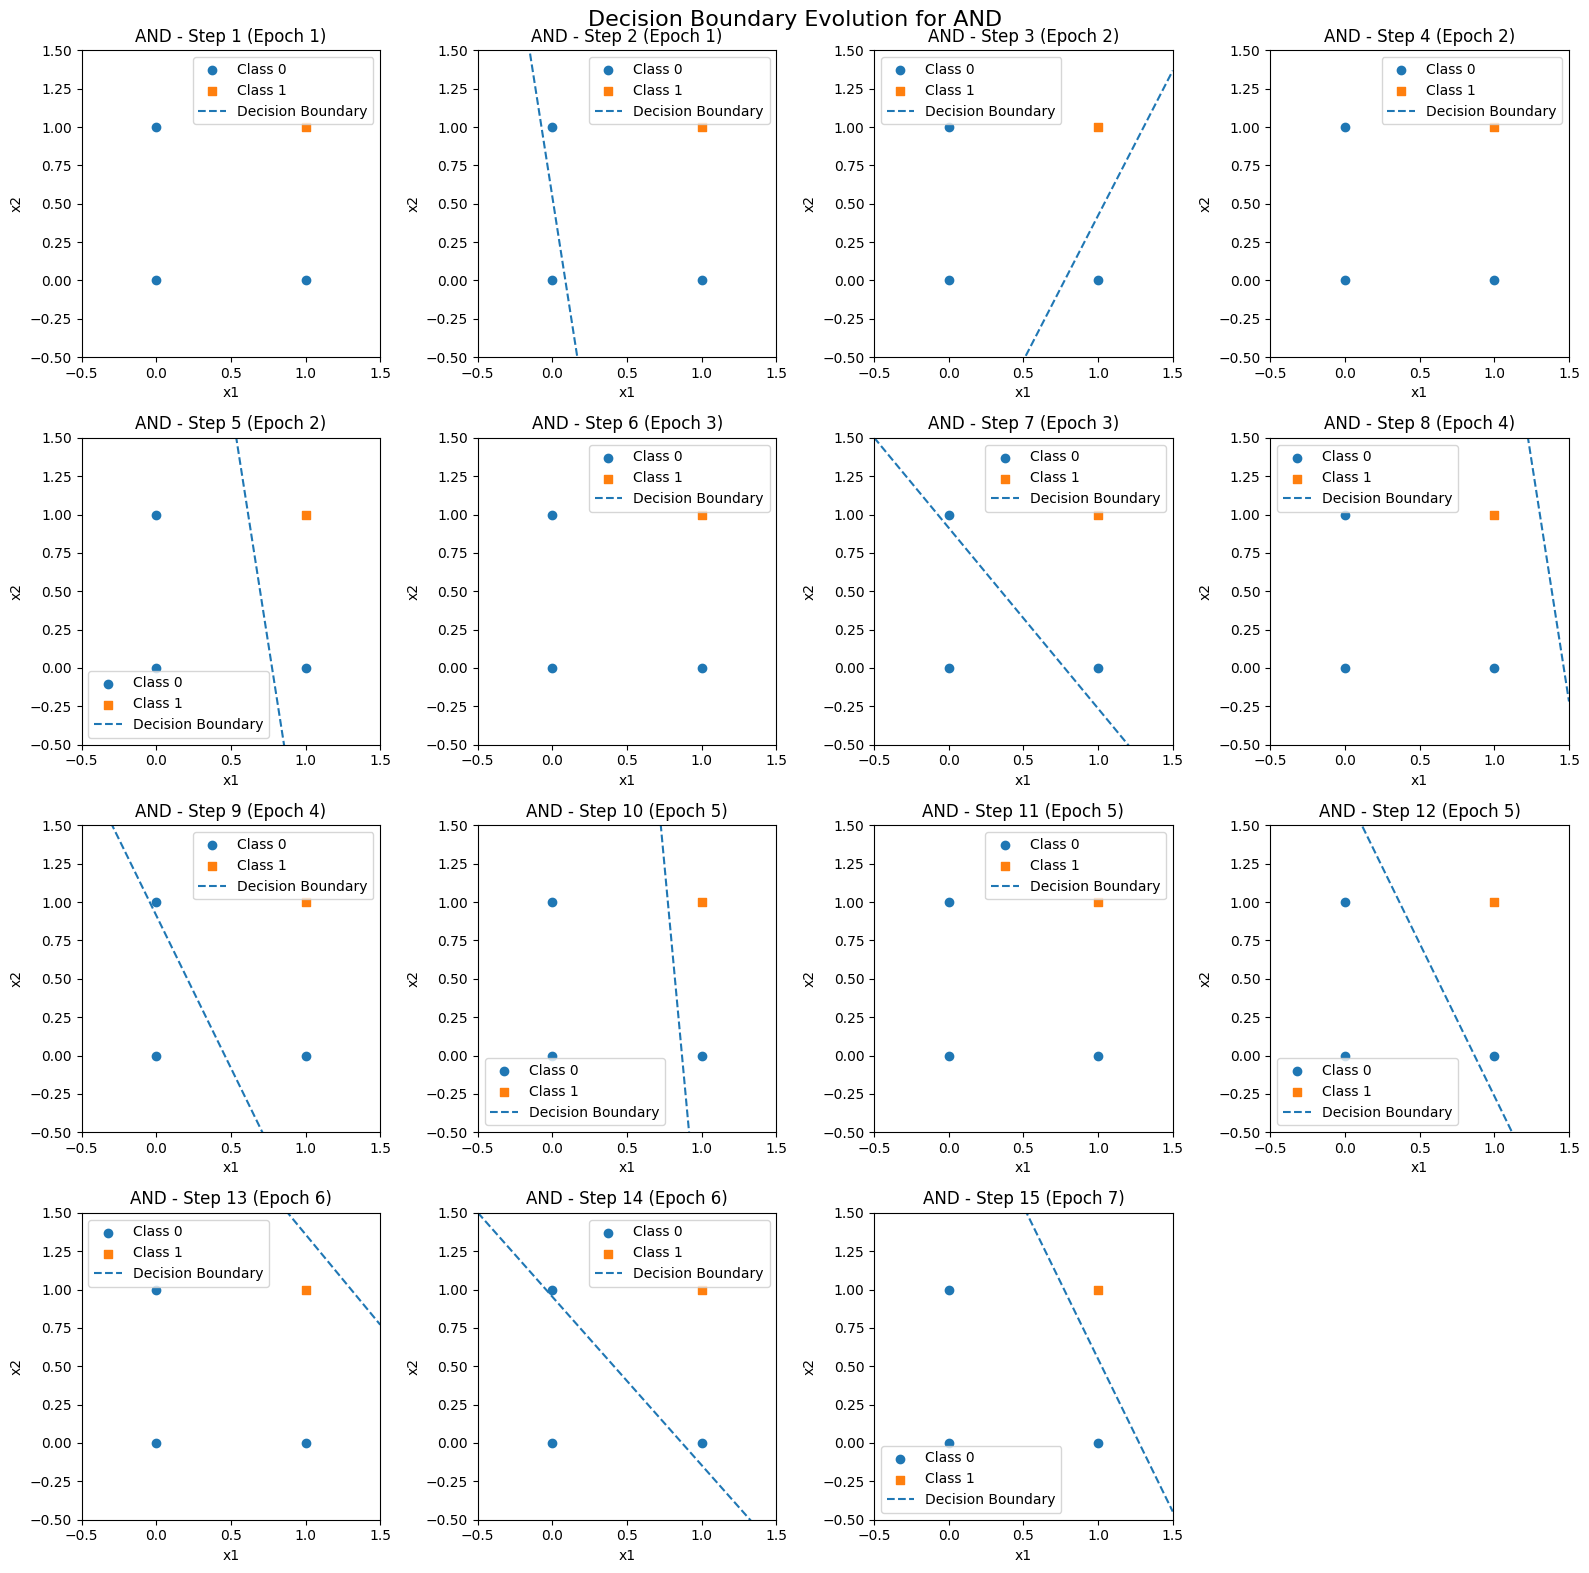

[AND] Training done. Final weights: [-3.12545988  2.45071431  1.23199394]
--------------------------------------------------------------------------------
[OR] Initial weights: [-0.12545988  0.45071431  0.23199394]
[OR] Converged at epoch 1. Final weights: [-0.12545988  0.45071431  0.23199394]

[OR] No weight updates happened (already separable with init weights).
[NOT] Initial weights: [-0.12545988  0.45071431  0.23199394]
[NOT] Epoch 01, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[0.87454012 0.45071431 0.23199394]
[NOT] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -1.54928569  0.23199394]
[NOT] Epoch 03, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -1.54928569  0.23199394]
[NOT] Converged at epoch 4. Final weights: [ 0.87454012 -1.5492

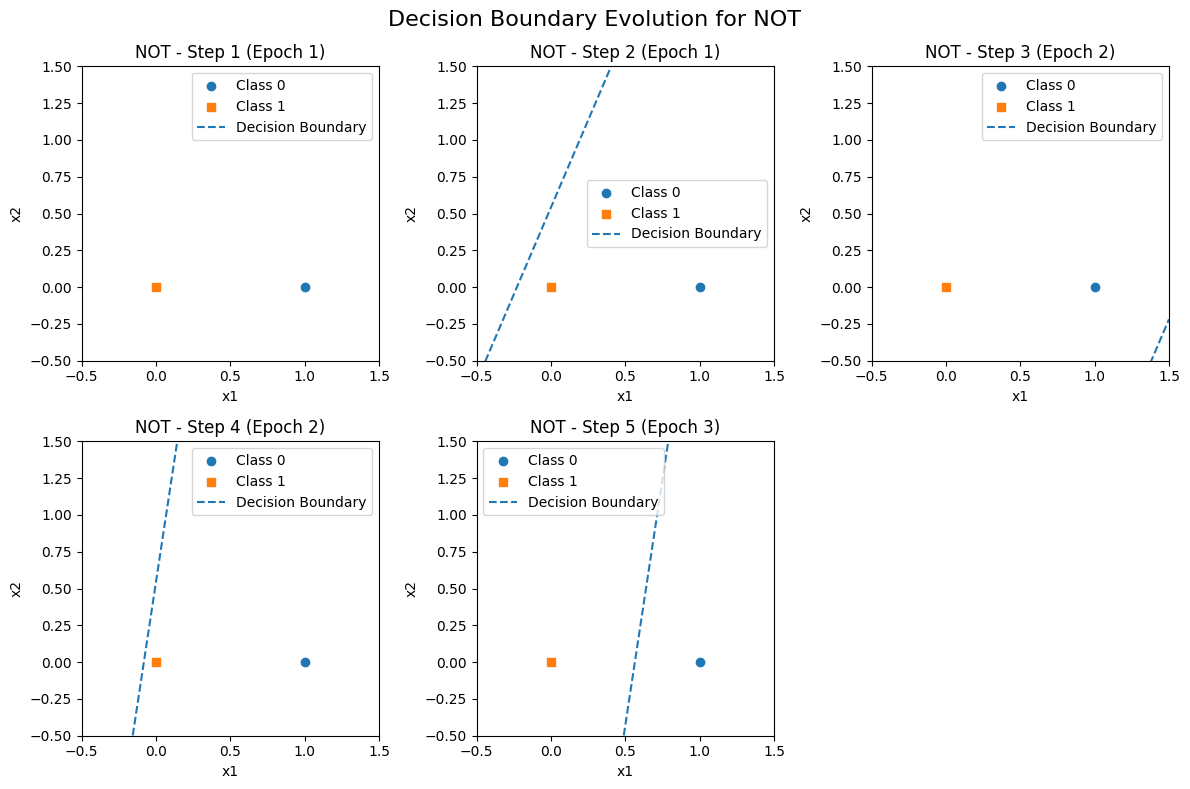

[NOT] Training done. Final weights: [ 0.87454012 -1.54928569  0.23199394]
--------------------------------------------------------------------------------


In [ ]:
import math

for gate in gates:
    X, y = get_gate_data(gate)
    p = Perceptron(lr=lr, n_epochs=n_epochs, random_state=42, verbose=True)
    final_w = p.fit(X, y, gate_name=gate)

    snaps = p.snapshots
    n = len(snaps)
    if n == 0:
        print(f"[{gate}] No weight updates happened (already separable with init weights).")
        continue

    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    if rows == 1 and cols == 1:
        axs = np.array([axs])
    axs = axs.flatten()

    for i, s in enumerate(snaps):
        w = s["w"]
        step = s["step"]
        epoch = s["epoch"]
        plot_decision_boundary(
            ax=axs[i],
            X2d=p.X2d_,
            y=p.y_,
            w=w,
            title=f"{gate} - Step {step} (Epoch {epoch})"
        )

    # hide unused axes
    for j in range(n, len(axs)):
        axs[j].axis('off')

    plt.suptitle(f"Decision Boundary Evolution for {gate}", fontsize=16)
    plt.tight_layout()
    plt.show()

    print(f"[{gate}] Training done. Final weights: {final_w}")
    print("-" * 80)

[AND] Initial weights: [-0.12545988  0.45071431  0.23199394]
[AND] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  0.45071431 -0.76800606]
[AND] Epoch 01, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-0.12545988  1.45071431  0.23199394]
[AND] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988  1.45071431 -0.76800606]
[AND] Epoch 02, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431 -0.76800606]
[AND] Epoch 02, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  0.23199394]
[AND] Epoch 03, sample 2, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  0.45071431  0.23199394]
[AND] Epoch 03, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  1.45071431  1.23199394]
[AND] Epoch 04, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-2.12545988  1.45071431  0.23199394]
[AND] Epoch 04, sample 3, y_true=1, y_pred=0, update=1.0, new_w=[-1.12545988  2.45071431  1.23199394]
[AND] Epoch 05, 

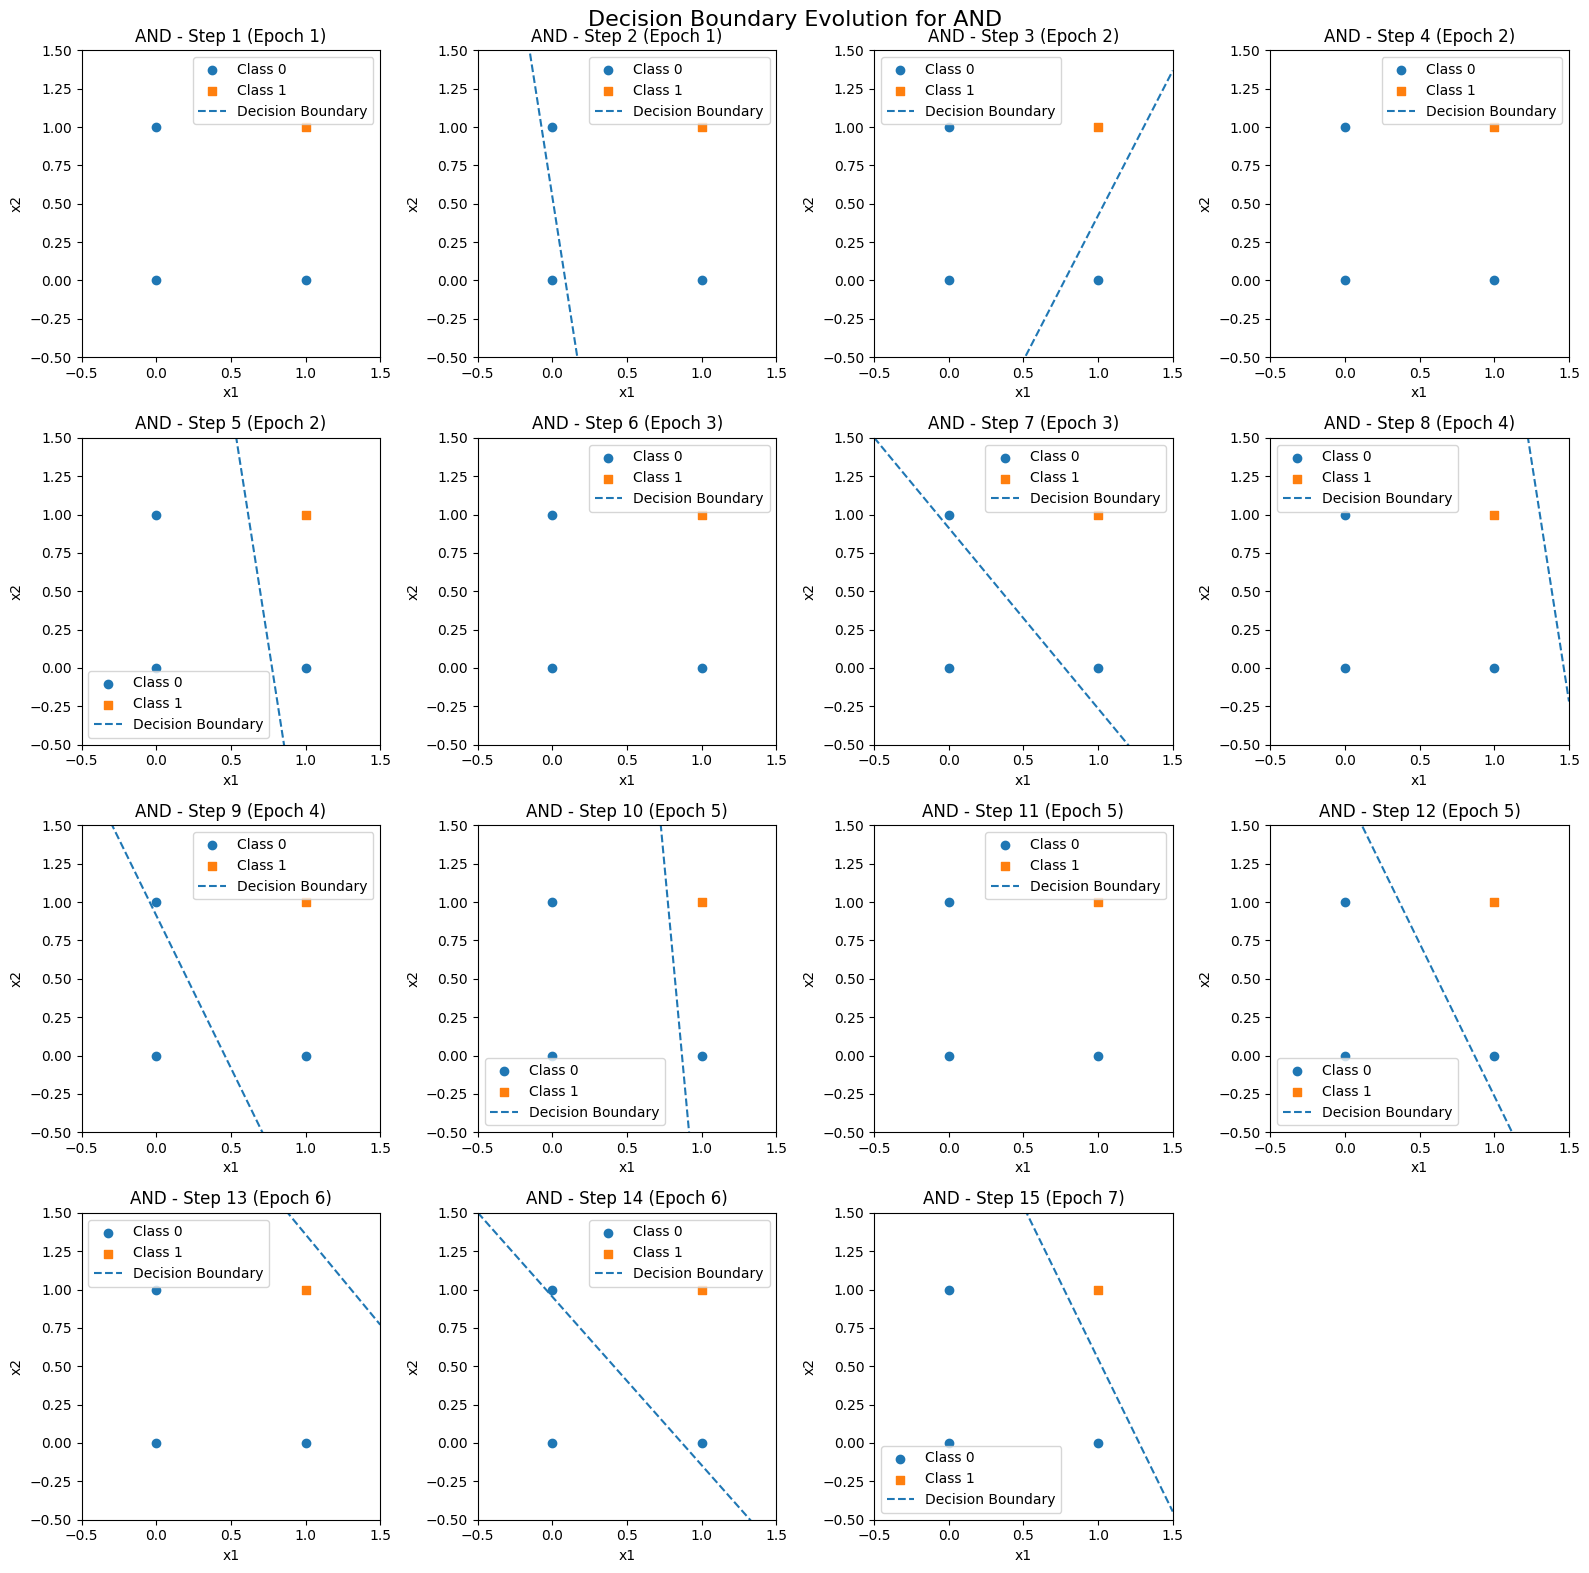

[AND] Training done. Final weights: [-3.12545988  2.45071431  1.23199394]
--------------------------------------------------------------------------------
[OR] Initial weights: [-0.12545988  0.45071431  0.23199394]
[OR] Converged at epoch 1. Final weights: [-0.12545988  0.45071431  0.23199394]

[OR] No weight updates happened (already separable with initial weights).
[NOT] Initial weights: [-0.12545988  0.45071431  0.23199394]
[NOT] Epoch 01, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[0.87454012 0.45071431 0.23199394]
[NOT] Epoch 01, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -0.54928569  0.23199394]
[NOT] Epoch 02, sample 1, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -1.54928569  0.23199394]
[NOT] Epoch 03, sample 0, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -1.54928569  0.23199394]
[NOT] Converged at epoch 4. Final weights: [ 0.87454012 -1.5

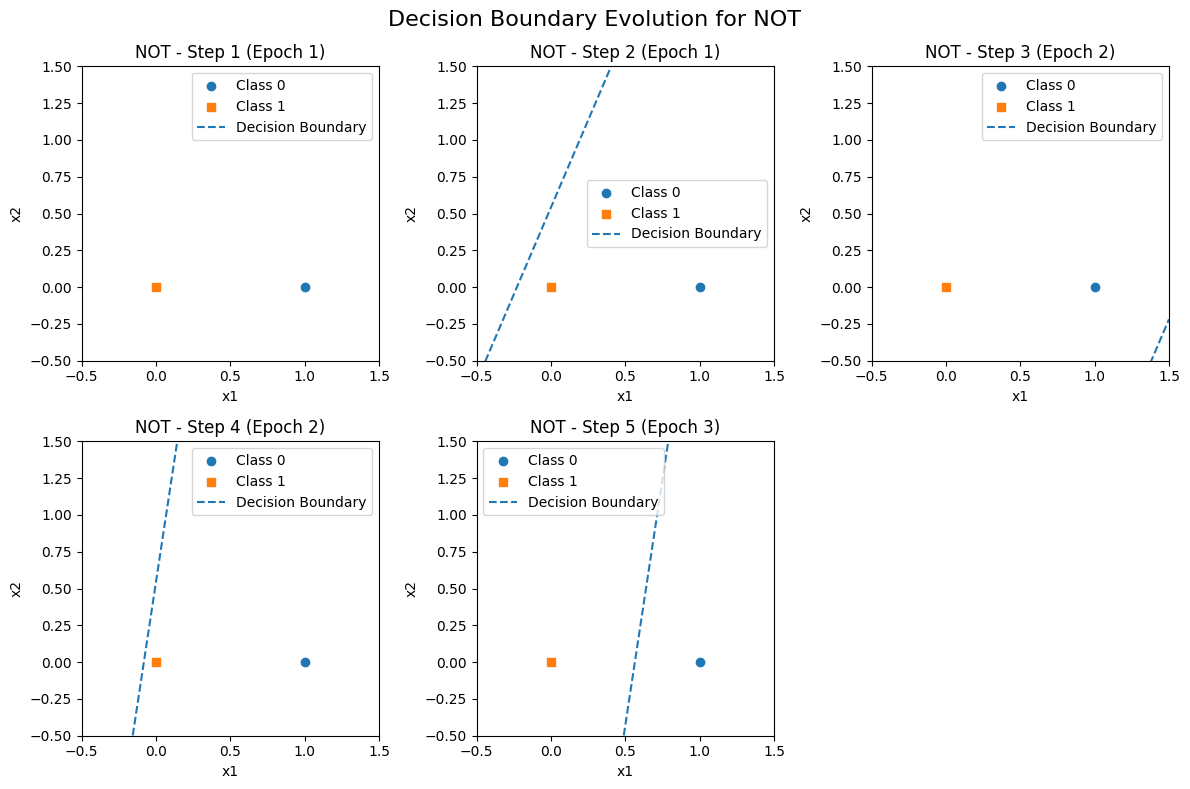

[NOT] Training done. Final weights: [ 0.87454012 -1.54928569  0.23199394]
--------------------------------------------------------------------------------


In [ ]:
for gate in gates:
    X, y = get_gate_data(gate)
    p = Perceptron(lr=lr, n_epochs=n_epochs, random_state=42, verbose=True)
    final_w = p.fit(X, y, gate_name=gate)

    snaps = p.snapshots
    n = len(snaps)

    if n == 0:
        print(f"[{gate}] No weight updates happened (already separable with initial weights).")
        continue

    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    if rows == 1 and cols == 1:
        axs = np.array([axs])
    axs = axs.flatten()

    for i, s in enumerate(snaps):
        w = s["w"]
        step = s["step"]
        epoch = s["epoch"]
        plot_decision_boundary(
            ax=axs[i],
            X2d=p.X2d_,
            y=p.y_,
            w=w,
            title=f"{gate} - Step {step} (Epoch {epoch})"
        )

    for j in range(n, len(axs)):
        axs[j].axis('off')

    plt.suptitle(f"Decision Boundary Evolution for {gate}", fontsize=16)
    plt.tight_layout()
    plt.show()

    print(f"[{gate}] Training done. Final weights: {final_w}")
    print("-" * 80)


## Perceptron on XOR

Code the perceptron learning algorithm for the XOR gate using Python. Show the weights after each update. Plot the decision boundary after each weight update using Python's built-in packages. Analyze and identify the pattern that prevents the algorithm from converging.

In [ ]:
def get_xor_data():
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=float)
    y = np.array([0, 1, 1, 0])
    return X, y

[XOR] Initial weights: [-0.12545988  0.45071431  0.23199394]
[XOR] Epoch 01, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[-1.12545988 -0.54928569 -0.76800606]
[XOR] Epoch 02, sample 1, y_true=1, y_pred=0, update=1.0, new_w=[-0.12545988 -0.54928569  0.23199394]
[XOR] Epoch 02, sample 2, y_true=1, y_pred=0, update=1.0, new_w=[0.87454012 0.45071431 0.23199394]
[XOR] Epoch 02, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -0.54928569 -0.76800606]
[XOR] Epoch 03, sample 1, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -0.54928569  0.23199394]
[XOR] Epoch 03, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[-0.12545988 -1.54928569 -0.76800606]
[XOR] Epoch 04, sample 1, y_true=1, y_pred=0, update=1.0, new_w=[ 0.87454012 -1.54928569  0.23199394]
[XOR] Epoch 04, sample 2, y_true=1, y_pred=0, update=1.0, new_w=[ 1.87454012 -0.54928569  0.23199394]
[XOR] Epoch 04, sample 3, y_true=0, y_pred=1, update=-1.0, new_w=[ 0.87454012 -1.54928569 -0.76800606]
[XOR] Epoch 05, samp

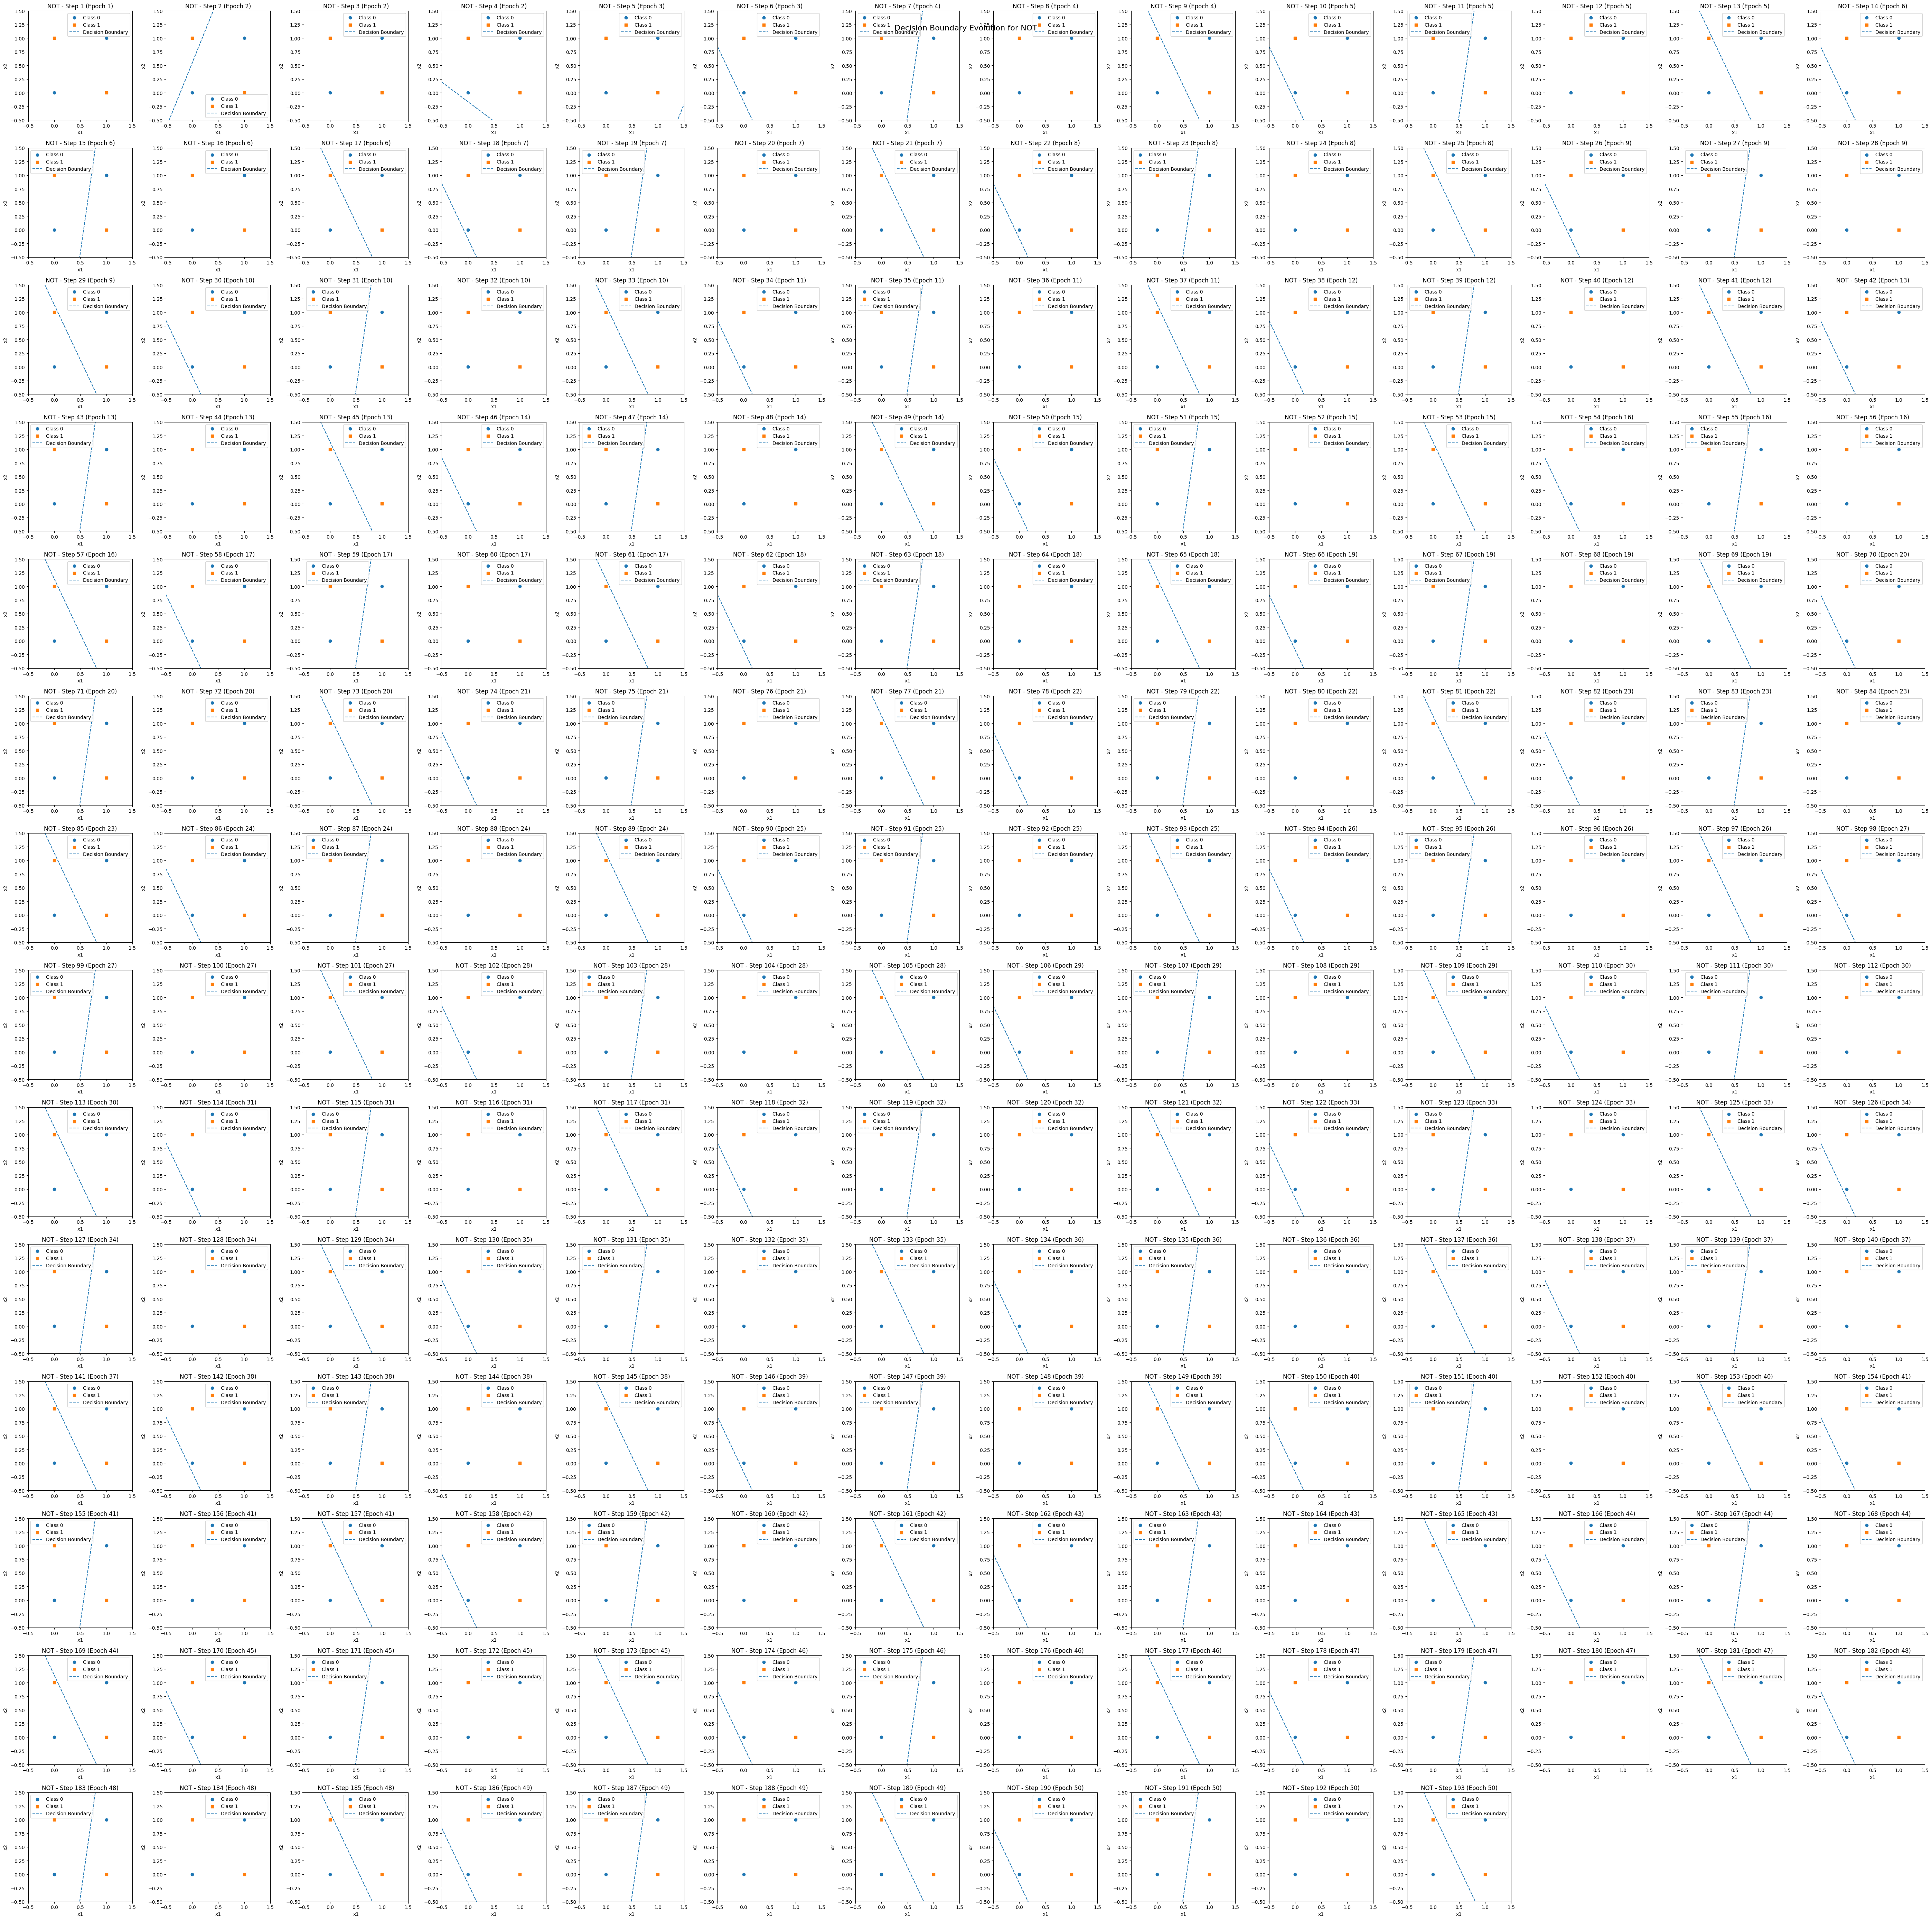

[NOT] Training done. Final weights: [ 0.87454012 -1.54928569 -0.76800606]
--------------------------------------------------------------------------------


In [ ]:
X, y = get_xor_data()
p = Perceptron(lr=lr, n_epochs=n_epochs, random_state=42, verbose=True)
final_w = p.fit(X, y, gate_name="XOR")

snaps = p.snapshots
n = len(snaps)

if n == 0:
    print(f"[{gate}] No weight updates happened (already separable with initial weights).")

cols = math.ceil(math.sqrt(n))
rows = math.ceil(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
if rows == 1 and cols == 1:
    axs = np.array([axs])
axs = axs.flatten()

for i, s in enumerate(snaps):
    w = s["w"]
    step = s["step"]
    epoch = s["epoch"]
    plot_decision_boundary(
        ax=axs[i],
        X2d=p.X2d_,
        y=p.y_,
        w=w,
        title=f"{gate} - Step {step} (Epoch {epoch})"
    )

for j in range(n, len(axs)):
    axs[j].axis('off')

plt.suptitle(f"Decision Boundary Evolution for {gate}", fontsize=16)
plt.tight_layout()
plt.show()

print(f"[{gate}] Training done. Final weights: {final_w}")
print("-" * 80)

### Why XOR isnt converging?

* The perceptron tries to find a **linear decision boundary** to separate classes.
* XOR’s output pattern is **not linearly separable**; no straight line can separate the classes perfectly.
* Points of the same class lie diagonally opposite, making linear separation impossible.
* Because of this, the perceptron keeps updating weights endlessly, trying to correct misclassifications.
* The weight updates **oscillate and cycle without stabilizing**.
* This continuous flipping prevents the algorithm from converging (training error never reaches zero).
* Hence, the perceptron fails to learn the XOR function.
* To solve XOR, a **multi-layer perceptron (MLP)** with nonlinear activation functions is needed.


# Lab Assignment - 2

Write a Python function to find the minima of the following functions using gradient descent,
           a) f(x,y) = (x−5)2  + (y+2)2 the descent starts at (0,0)
           b) f(x,y) =(x² + y - 11)² + (x + y² - 7)². Try starting the descent at (2,2), (-2,2), (2,-2), and (-2,-2).
Plot the graph after every 5 epochs. Run the above two scenarios with a learning rate of 0.1 and 2.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [ ]:
def f_a(xy):
    x, y = xy
    return (x - 5) ** 2 + (y + 2) ** 2

def grad_f_a(xy):
    x, y = xy
    # gradient of (x-5)^2 is 2*(x-5); of (y+2)^2 is 2*(y+2)
    return np.array([2 * (x - 5), 2 * (y + 2)])

def f_b(xy):
    x, y = xy
    # Himmelblau's function: (x^2 + y - 11)^2 + (x + y^2 -7)^2
    return (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2

def grad_f_b(xy):
    x, y = xy
    # Partial derivatives from analytic computation
    # Let A = x^2 + y - 11, B = x + y^2 - 7
    A = x ** 2 + y - 11
    B = x + y ** 2 - 7
    dfdx = 2 * A * (2 * x) + 2 * B * 1
    dfdy = 2 * A * 1 + 2 * B * (2 * y)
    return np.array([dfdx, dfdy])

In [ ]:
def gradient_descent(func, grad_func, start, lr, max_epochs=1000, log_every=5):
    xy = np.array(start, dtype=float)
    history = [xy.copy()]
    fvals = [func(xy)]
    diverged = False

    for epoch in range(1, max_epochs + 1):
        g = grad_func(xy)
        xy = xy - lr * g
        fval = func(xy)

        history.append(xy.copy())
        fvals.append(fval)

        if np.isnan(fval) or np.isinf(fval) or fval > 1e6:
            diverged = True
            print(f"  [!] Diverged at epoch {epoch}, fval={fval}")
            break

        if epoch % log_every == 0:
            print(f"Epoch {epoch:03d} | lr={lr:.3g} | x={xy[0]:.5f}, y={xy[1]:.5f} | f={fval:.6f}")

    return np.array(history), np.array(fvals), diverged

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def plot_descent(func, history, title, ax=None):
    x_vals = history[:, 0]
    y_vals = history[:, 1]

    margin = 1.5
    x_min, x_max = x_vals.min() - margin, x_vals.max() + margin
    y_min, y_max = y_vals.min() - margin, y_vals.max() + margin
    xs = np.linspace(x_min, x_max, 400)
    ys = np.linspace(y_min, y_max, 400)
    X, Y = np.meshgrid(xs, ys)
    Z = np.vectorize(lambda xx, yy: func(np.array([xx, yy])))(X, Y)

    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 4))

    # contour
    levels = np.logspace(np.log10(Z.min()+1e-6), np.log10(Z.max()+1e-6), 25)
    cs = ax.contour(X, Y, Z, levels=levels, norm=LogNorm(), cmap="viridis")
    ax.plot(x_vals, y_vals, marker='o', markersize=3, linewidth=1.5, label="descent path")
    ax.scatter([x_vals[0]], [y_vals[0]], color='green', label="start", zorder=5)
    ax.scatter([x_vals[-1]], [y_vals[-1]], color='red', label="end", zorder=5)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(True)

In [ ]:
def run_experiment():
    # Part (a): f_a, start at (0,0)
    print("\n(a): f(x,y) = (x-5)^2 + (y+2)^2")
    starts_a = [(0, 0)]
    for lr in [0.1, 2]:
        for start in starts_a:
            print(f"\nStarting gradient descent on (a) from {start} with lr={lr}")
            history, fvals, diverged = gradient_descent(f_a, grad_f_a, start, lr,
                                                        max_epochs=100, log_every=5)
            final_pt = history[-1]
            print(f"Final point: x={final_pt[0]:.6f}, y={final_pt[1]:.6f}, f={fvals[-1]:.6f}")
            num_plots = len(history) // 5
            if num_plots > 0:
                fig, axs = plt.subplots(1, num_plots, figsize=(4 * num_plots, 4))
                if num_plots == 1:
                    axs = [axs]
                for i, ax in enumerate(axs):
                    idx = (i + 1) * 5
                    if idx >= len(history):
                        idx = len(history) - 1
                    plot_descent(f_a, history[:idx+1], title=f"(a) lr={lr}, epoch={idx}", ax=ax)
                plt.tight_layout()
                plt.show()
            else:
                print("  Skipping plot: Not enough steps recorded for plotting.")


    # Part (b): Himmelblau's function, four starting points
    print("\n(b): Himmelblau's function")
    starts_b = [(2, 2), (-2, 2), (2, -2), (-2, -2)]
    for lr in [0.1, 2]:
        for start in starts_b:
            print(f"\nStarting gradient descent on (b) from {start} with lr={lr}")
            history, fvals, diverged = gradient_descent(f_b, grad_f_b, start, lr,
                                                        max_epochs=200, log_every=5)
            final_pt = history[-1]
            print(f"Final point: x={final_pt[0]:.6f}, y={final_pt[1]:.6f}, f={fvals[-1]:.6f}")
            num_snapshots = min(8, len(history) // 5)
            if num_snapshots > 0:
                fig, axs = plt.subplots(2, num_snapshots//2, figsize=(5 * (num_snapshots//2), 8))
                axs = axs.flatten()
                for i in range(num_snapshots):
                    epoch_idx = (i + 1) * 5
                    if epoch_idx >= len(history):
                        epoch_idx = len(history) - 1
                    plot_descent(f_b, history[:epoch_idx+1],
                                 title=f"(b) lr={lr}, start={start}, epoch={epoch_idx}", ax=axs[i])

                for j in range(num_snapshots, len(axs)):
                    axs[j].axis('off')
                plt.tight_layout()
                plt.show()
            else:
                print("  Skipping plot: Not enough steps recorded for plotting.")


(a): f(x,y) = (x-5)^2 + (y+2)^2

Starting gradient descent on (a) from (0, 0) with lr=0.1
Epoch 005 | lr=0.1 | x=3.36160, y=-1.34464 | f=3.113851
Epoch 010 | lr=0.1 | x=4.46313, y=-1.78525 | f=0.334347
Epoch 015 | lr=0.1 | x=4.82408, y=-1.92963 | f=0.035900
Epoch 020 | lr=0.1 | x=4.94235, y=-1.97694 | f=0.003855
Epoch 025 | lr=0.1 | x=4.98111, y=-1.99244 | f=0.000414
Epoch 030 | lr=0.1 | x=4.99381, y=-1.99752 | f=0.000044
Epoch 035 | lr=0.1 | x=4.99797, y=-1.99919 | f=0.000005
Epoch 040 | lr=0.1 | x=4.99934, y=-1.99973 | f=0.000001
Epoch 045 | lr=0.1 | x=4.99978, y=-1.99991 | f=0.000000
Epoch 050 | lr=0.1 | x=4.99993, y=-1.99997 | f=0.000000
Epoch 055 | lr=0.1 | x=4.99998, y=-1.99999 | f=0.000000
Epoch 060 | lr=0.1 | x=4.99999, y=-2.00000 | f=0.000000
Epoch 065 | lr=0.1 | x=5.00000, y=-2.00000 | f=0.000000
Epoch 070 | lr=0.1 | x=5.00000, y=-2.00000 | f=0.000000
Epoch 075 | lr=0.1 | x=5.00000, y=-2.00000 | f=0.000000
Epoch 080 | lr=0.1 | x=5.00000, y=-2.00000 | f=0.000000
Epoch 085 | l

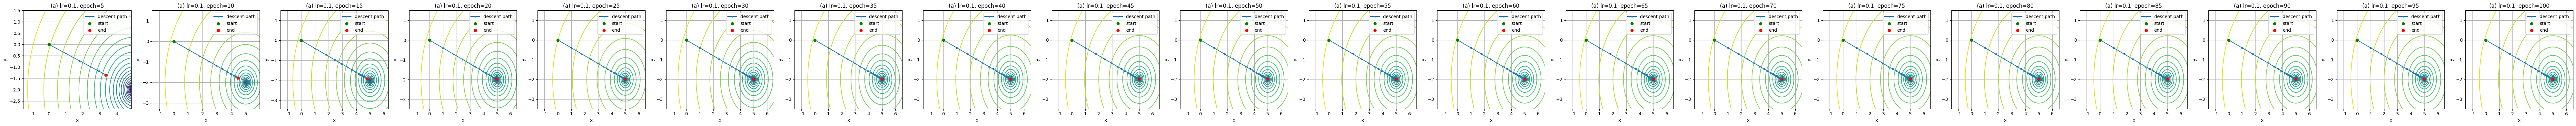


Starting gradient descent on (a) from (0, 0) with lr=2
  [!] Diverged at epoch 5, fval=1712421.0
Final point: x=1220.000000, y=-488.000000, f=1712421.000000


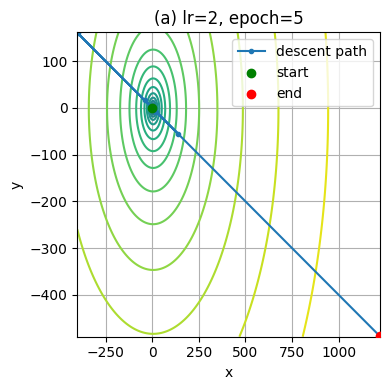


(b): Himmelblau's function

Starting gradient descent on (b) from (2, 2) with lr=0.1
  [!] Diverged at epoch 2, fval=29826802.96754551
Final point: x=-74.003200, y=-23.180800, f=29826802.967546
  Skipping plot: Not enough steps recorded for plotting.

Starting gradient descent on (b) from (-2, 2) with lr=0.1
  [!] Diverged at epoch 2, fval=104282623.10720007
Final point: x=29.600000, y=-100.800000, f=104282623.107200
  Skipping plot: Not enough steps recorded for plotting.

Starting gradient descent on (b) from (2, -2) with lr=0.1
  [!] Diverged at epoch 2, fval=6002702598.126514
Final point: x=-278.393600, y=-14.912000, f=6002702598.126514
  Skipping plot: Not enough steps recorded for plotting.

Starting gradient descent on (b) from (-2, -2) with lr=0.1
  [!] Diverged at epoch 2, fval=687743878.6767963
Final point: x=162.003200, y=-10.508800, f=687743878.676796
  Skipping plot: Not enough steps recorded for plotting.

Starting gradient descent on (b) from (2, 2) with lr=2
  [!] Dive

In [ ]:
run_experiment()



* **Function (a)** is a convex quadratic; gradient descent will reliably converge to the global minimum at **(5, −2)**. With learning rate 0.1 it converges smoothly; with rate 2 it may oscillate or overshoot initially but still reaches near the minimum quickly because the curvature is gentle.
* **Function (b)** is **Himmelblau’s function**, which has **multiple local minima** (four known minima roughly at (3.0, 2.0), (−2.805, 3.131), (−3.779, −3.283), (3.584, −1.848)). The outcome depends on the starting point and learning rate.

  * Starting at different seeds shows convergence to different minima.
  * A high learning rate (e.g., 2) can cause divergence or chaotic jumps, especially near saddle regions.
* **Plotting every 5 epochs** shows the trajectory, allowing you to observe whether descent is smooth, stuck, oscillatory, or diverging.


# Lab Assignment - 3

Build a Python function to classify images from the MNIST dataset as “zero” or “not zero” using a single neuron with a sigmoid activation function:
a) Each MNIST image is of size 28x28. Flatten each image into a 1D vector.
b) Set up your dataset so that images of the digit zero are labeled as 1, and all other digits are labeled as 0.
c) Train your single neuron (binary classifier) without using TensorFlow, Keras, or PyTorch—use only basic Python and NumPy.
d) Experiment with three types of gradient descent: (i) stochastic, (ii) batch, and (iii) mini-batch.
e) For each method, either print the loss directly after each epoch or store the loss and accuracy to plot after training, to facilitate visualization.

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_train_full = X_train_full.reshape(X_train_full.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

y_train_full = (y_train_full == 0).astype(int)
y_test = (y_test == 0).astype(int)

X_train = X_train_full
y_train = y_train_full

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def compute_loss(y_true, y_pred):
    eps = 1e-9
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
def accuracy(y_true, y_pred):
    preds = (y_pred >= 0.5).astype(int)
    return np.mean(preds == y_true)

In [ ]:
def train_single_neuron(X, y, lr=0.1, epochs=10, gd_type="batch", batch_size=32):
    np.random.seed(42)
    n_samples, n_features = X.shape
    W = np.zeros(n_features)
    b = 0.0

    loss_hist = []
    acc_hist = []

    for epoch in range(epochs):
        if gd_type == "stochastic":
            # shuffle each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            for i in indices:
                xi = X[i]
                yi = y[i]
                z = np.dot(xi, W) + b
                pred = sigmoid(z)
                # gradient
                grad_w = (pred - yi) * xi
                grad_b = (pred - yi)
                W -= lr * grad_w
                b -= lr * grad_b

        elif gd_type == "mini-batch":
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            for start in range(0, n_samples, batch_size):
                end = start + batch_size
                batch_idx = indices[start:end]
                Xb = X[batch_idx]
                yb = y[batch_idx]
                preds = sigmoid(np.dot(Xb, W) + b)
                grad_w = np.dot((preds - yb), Xb) / len(yb)
                grad_b = np.mean(preds - yb)
                W -= lr * grad_w
                b -= lr * grad_b

        elif gd_type == "batch":
            preds = sigmoid(np.dot(X, W) + b)
            grad_w = np.dot((preds - y), X) / n_samples
            grad_b = np.mean(preds - y)
            W -= lr * grad_w
            b -= lr * grad_b

        train_preds = sigmoid(np.dot(X, W) + b)
        loss = compute_loss(y, train_preds)
        acc = accuracy(y, train_preds)
        loss_hist.append(loss)
        acc_hist.append(acc)
        print(f"[{gd_type.upper()}] Epoch {epoch+1}/{epochs} - Loss: {loss:.4f} - Acc: {acc:.4f}")

    return W, b, loss_hist, acc_hist


=== Training with batch gradient descent ===
[BATCH] Epoch 1/20 - Loss: 0.3722 - Acc: 0.9013
[BATCH] Epoch 2/20 - Loss: 0.3361 - Acc: 0.9013
[BATCH] Epoch 3/20 - Loss: 0.3128 - Acc: 0.9013
[BATCH] Epoch 4/20 - Loss: 0.2938 - Acc: 0.9013
[BATCH] Epoch 5/20 - Loss: 0.2772 - Acc: 0.9013
[BATCH] Epoch 6/20 - Loss: 0.2624 - Acc: 0.9013
[BATCH] Epoch 7/20 - Loss: 0.2492 - Acc: 0.9013
[BATCH] Epoch 8/20 - Loss: 0.2374 - Acc: 0.9018
[BATCH] Epoch 9/20 - Loss: 0.2268 - Acc: 0.9058
[BATCH] Epoch 10/20 - Loss: 0.2173 - Acc: 0.9136
[BATCH] Epoch 11/20 - Loss: 0.2088 - Acc: 0.9224
[BATCH] Epoch 12/20 - Loss: 0.2010 - Acc: 0.9305
[BATCH] Epoch 13/20 - Loss: 0.1941 - Acc: 0.9375
[BATCH] Epoch 14/20 - Loss: 0.1877 - Acc: 0.9430
[BATCH] Epoch 15/20 - Loss: 0.1820 - Acc: 0.9474
[BATCH] Epoch 16/20 - Loss: 0.1767 - Acc: 0.9514
[BATCH] Epoch 17/20 - Loss: 0.1719 - Acc: 0.9547
[BATCH] Epoch 18/20 - Loss: 0.1674 - Acc: 0.9570
[BATCH] Epoch 19/20 - Loss: 0.1633 - Acc: 0.9592
[BATCH] Epoch 20/20 - Loss: 0.15

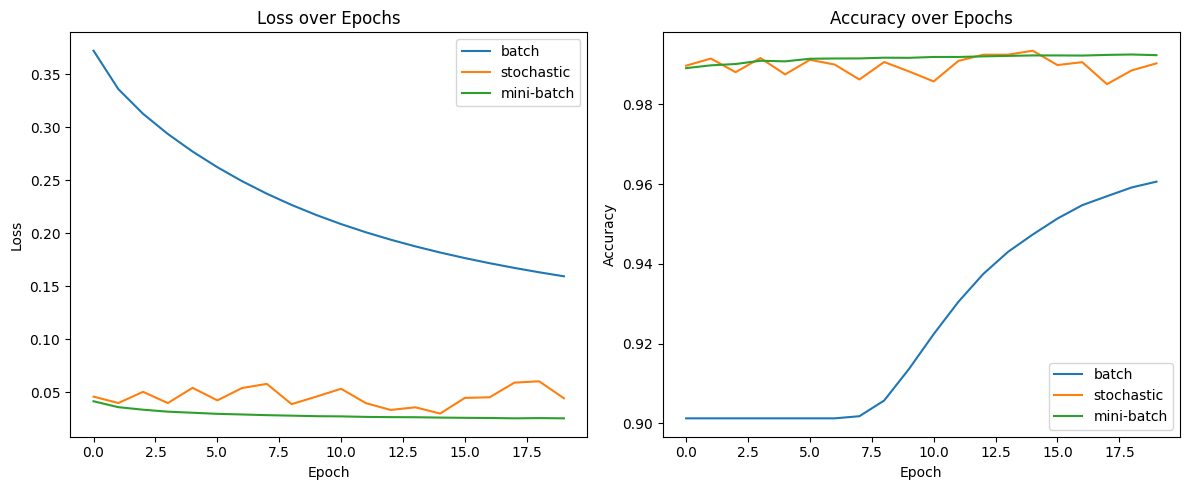

In [ ]:
results = {}
methods = ["batch", "stochastic", "mini-batch"]

for method in methods:
    print(f"\n=== Training with {method} gradient descent ===")
    W, b, loss_hist, acc_hist = train_single_neuron(
        X_train, y_train,
        lr=0.1,
        epochs=20,
        gd_type=method,
        batch_size=64
    )
    results[method] = (loss_hist, acc_hist)
    # Evaluate on test set
    test_preds = sigmoid(np.dot(X_test, W) + b)
    test_loss = compute_loss(y_test, test_preds)
    test_acc = accuracy(y_test, test_preds)
    print(f"Test Loss: {test_loss:.4f} - Test Acc: {test_acc:.4f}")

plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
for method in methods:
    plt.plot(results[method][0], label=method)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1,2,2)
for method in methods:
    plt.plot(results[method][1], label=method)
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Lab Assignment - 4

Train a multiclass classifier for the MNIST dataset (digits 0–9) using TensorFlow-Keras and PyTorch.
Flatten each image (28x28) to a 784-dimensional vector.
Use a model with an input layer of 784 neurons (one per pixel) and an output layer of 10 neurons (one per class) with softmax activation. Run your model for some fixed number of epochs n>50.
Train the model using batch, mini-batch, and stochastic gradient descent.
For each method and framework, plot loss and accuracy at the end.
Submit your well-commented code and a brief comparison of the results. Make your submission as a single zip file.

## Tensorflow-Keras Implementation

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next r

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# --- Define model ---
def build_model(input_shape=(784,), output_classes=10):
    model = Sequential([
        Flatten(input_shape=(28,28)),
        Dense(output_classes, activation='softmax')
    ])
    return model

In [ ]:
# --- Train using different GD types ---
batch_sizes = {
    "batch": X_train.shape[0],   # full batch
    "mini-batch": 64,
    "stochastic": 1
}

In [ ]:
n_epochs = 20
results_tf = {}

for method, batch_size in batch_sizes.items():
    print(f"\n=== TensorFlow-Keras: {method} gradient descent ===")
    model = build_model()
    optimizer = SGD(learning_rate=0.1)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train, y_train_cat,
        validation_data=(X_test, y_test_cat),
        epochs=n_epochs,
        batch_size=batch_size,
        verbose=0
    )
    results_tf[method] = history
    print(f"{method} done.")


=== TensorFlow-Keras: batch gradient descent ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


batch done.

=== TensorFlow-Keras: mini-batch gradient descent ===
mini-batch done.

=== TensorFlow-Keras: stochastic gradient descent ===
stochastic done.


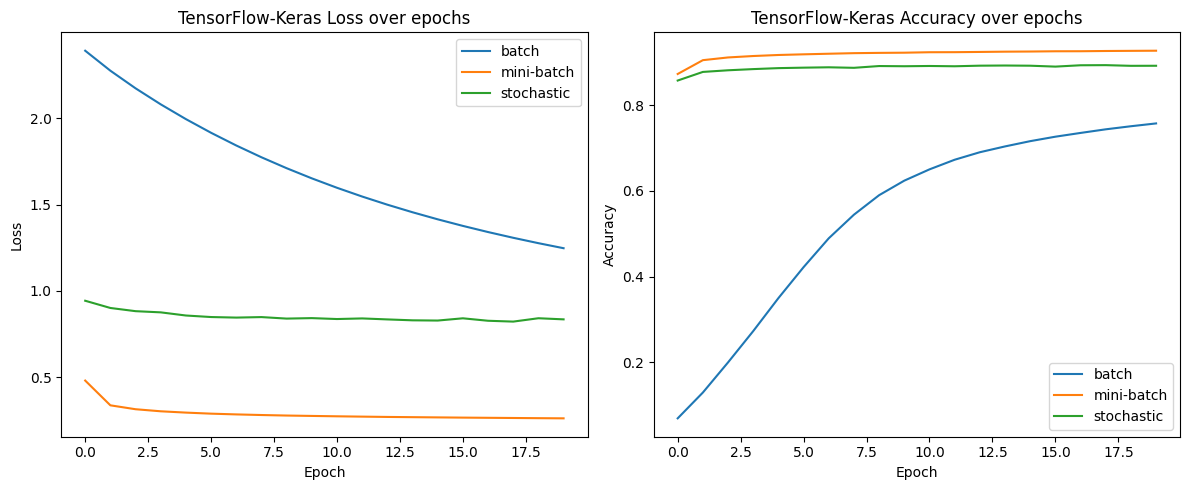

In [ ]:
# --- Plot TF results ---
plt.figure(figsize=(12,5))
for i, metric in enumerate(["loss", "accuracy"]):
    plt.subplot(1,2,i+1)
    for method in batch_sizes:
        plt.plot(results_tf[method].history[metric], label=method)
    plt.title(f"TensorFlow-Keras {metric.capitalize()} over epochs")
    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize())
    plt.legend()
plt.tight_layout()
plt.show()


## Pytorch Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# --- Model ---
class SimpleNN(nn.Module):
    def __init__(self, input_dim=784, output_dim=10):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return torch.softmax(self.fc(x), dim=1)

In [ ]:
def train_pytorch(model, train_loader, test_loader, lr=0.1, epochs=20):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_hist = []
    acc_hist = []

    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        # Evaluation
        model.eval()
        correct = 0
        total_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss_val = criterion(outputs, y_batch)
                total_loss += loss_val.item() * X_batch.size(0)
                _, preds = torch.max(outputs, 1)
                correct += (preds == y_batch).sum().item()
        avg_loss = total_loss / len(test_loader.dataset)
        acc = correct / len(test_loader.dataset)
        loss_hist.append(avg_loss)
        acc_hist.append(acc)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Acc: {acc:.4f}")
    return loss_hist, acc_hist

In [ ]:
batch_sizes = {"batch": len(train_dataset), "mini-batch": 64, "stochastic": 1}
results_pt = {}

for method, batch_size in batch_sizes.items():
    print(f"\n=== PyTorch: {method} gradient descent ===")
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=128)
    model = SimpleNN().to(device)
    loss_hist, acc_hist = train_pytorch(model, train_loader, test_loader, lr=0.1, epochs=20)
    results_pt[method] = (loss_hist, acc_hist)


=== PyTorch: batch gradient descent ===
Epoch 1/20 - Loss: 2.3020 - Acc: 0.1185
Epoch 2/20 - Loss: 2.3009 - Acc: 0.1317
Epoch 3/20 - Loss: 2.2998 - Acc: 0.1451
Epoch 4/20 - Loss: 2.2986 - Acc: 0.1595
Epoch 5/20 - Loss: 2.2975 - Acc: 0.1735
Epoch 6/20 - Loss: 2.2963 - Acc: 0.1889
Epoch 7/20 - Loss: 2.2951 - Acc: 0.2032
Epoch 8/20 - Loss: 2.2938 - Acc: 0.2174
Epoch 9/20 - Loss: 2.2925 - Acc: 0.2326
Epoch 10/20 - Loss: 2.2912 - Acc: 0.2459
Epoch 11/20 - Loss: 2.2899 - Acc: 0.2584
Epoch 12/20 - Loss: 2.2885 - Acc: 0.2724
Epoch 13/20 - Loss: 2.2871 - Acc: 0.2845
Epoch 14/20 - Loss: 2.2856 - Acc: 0.2950
Epoch 15/20 - Loss: 2.2841 - Acc: 0.3078
Epoch 16/20 - Loss: 2.2825 - Acc: 0.3192
Epoch 17/20 - Loss: 2.2809 - Acc: 0.3297
Epoch 18/20 - Loss: 2.2792 - Acc: 0.3394
Epoch 19/20 - Loss: 2.2775 - Acc: 0.3473
Epoch 20/20 - Loss: 2.2757 - Acc: 0.3557

=== PyTorch: mini-batch gradient descent ===
Epoch 1/20 - Loss: 1.6621 - Acc: 0.8687
Epoch 2/20 - Loss: 1.6146 - Acc: 0.8936
Epoch 3/20 - Loss: 1.5

In [ ]:
plt.figure(figsize=(12,5))
for i, metric in enumerate(["loss", "accuracy"]):
    plt.subplot(1,2,i+1)
    for method in batch_sizes:
        plt.plot(results_pt[method][i], label=method)
    plt.title(f"PyTorch {metric.capitalize()} over epochs")
    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize())
    plt.legend()
plt.tight_layout()
plt.show()


# Lab Assignment - 5

Train the following Convolutional Neural Networks for the MNIST dataset (digits 0–9) using TensorFlow-Keras and PyTorch.
 Train the CNN model with one convolutional layer, one pooling layer, and a dense softmax output layer using mini-batch gradient descent.
Train the LeNet model using mini-batch gradient descent.
For each method and framework, plot loss and accuracy at the end. Train for a varying number of epochs.

## Tensorflow - Keras Implementation

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8661 - loss: 0.4931 - val_accuracy: 0.9664 - val_loss: 0.1167
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9686 - loss: 0.1098 - val_accuracy: 0.9734 - val_loss: 0.0894
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9779 - loss: 0.0760 - val_accuracy: 0.9781 - val_loss: 0.0701
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9815 - loss: 0.0644 - val_accuracy: 0.9813 - val_loss: 0.0572
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9846 - loss: 0.0508 - val_accuracy: 0.9815 - val_loss: 0.0587
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9881 - loss: 0.0425 - val_accuracy: 0.9805 - val_loss: 0.0593
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9881 - loss: 0.0402 - val_accuracy: 0.9830 - val_loss: 0.0547
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9892 - loss: 0.0366 - 

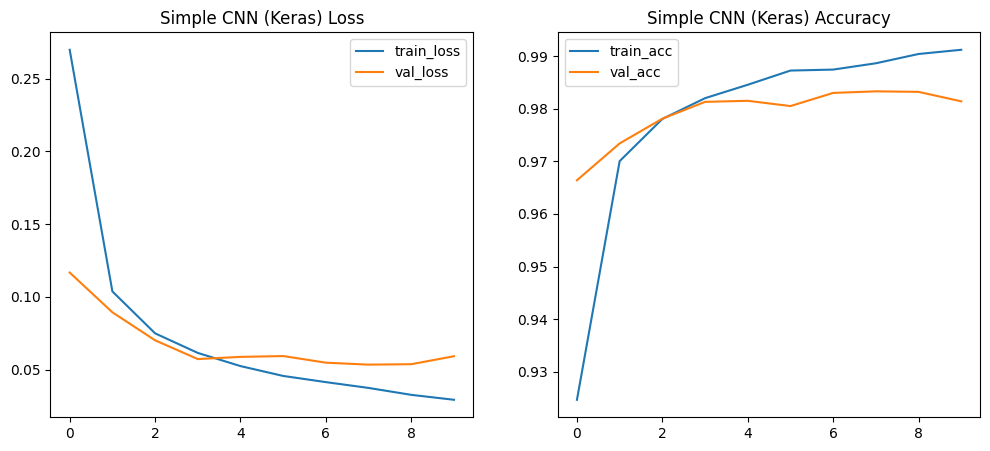

TypeError: AveragePooling2D.__init__() missing 1 required positional argument: 'pool_size'

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # normalize
x_train = x_train[..., tf.newaxis]  # (60000, 28, 28, 1)
x_test = x_test[..., tf.newaxis]

# =====================
#  Model 1: Simple CNN
# =====================
def simple_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
    return model

# =====================
#  Model 2: LeNet
# =====================
def lenet():
    model = models.Sequential([
        layers.Conv2D(6, (5,5), activation='relu', input_shape=(28,28,1), padding='same'),
        layers.AveragePooling2D(),
        layers.Conv2D(16, (5,5), activation='relu'),
        layers.AveragePooling2D(),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Training function
def train_and_plot(model, name, epochs=5, batch_size=64):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test))

    # Plot Loss and Accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f"{name} Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title(f"{name} Accuracy")
    plt.legend()

    plt.show()

# Run training
train_and_plot(simple_cnn(), "Simple CNN (Keras)", epochs=10)
train_and_plot(lenet(), "LeNet (Keras)", epochs=10)


## PyTorch Implementation

100%|██████████| 9.91M/9.91M [00:00<00:00, 37.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.12MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.5MB/s]


Epoch 1/10 | Train Acc: 92.45% | Test Acc: 97.05%
Epoch 2/10 | Train Acc: 97.38% | Test Acc: 97.86%
Epoch 3/10 | Train Acc: 97.99% | Test Acc: 97.98%
Epoch 4/10 | Train Acc: 98.30% | Test Acc: 98.15%
Epoch 5/10 | Train Acc: 98.51% | Test Acc: 97.98%
Epoch 6/10 | Train Acc: 98.75% | Test Acc: 98.18%
Epoch 7/10 | Train Acc: 98.90% | Test Acc: 98.29%
Epoch 8/10 | Train Acc: 99.00% | Test Acc: 98.22%
Epoch 9/10 | Train Acc: 99.11% | Test Acc: 98.21%
Epoch 10/10 | Train Acc: 99.22% | Test Acc: 98.25%


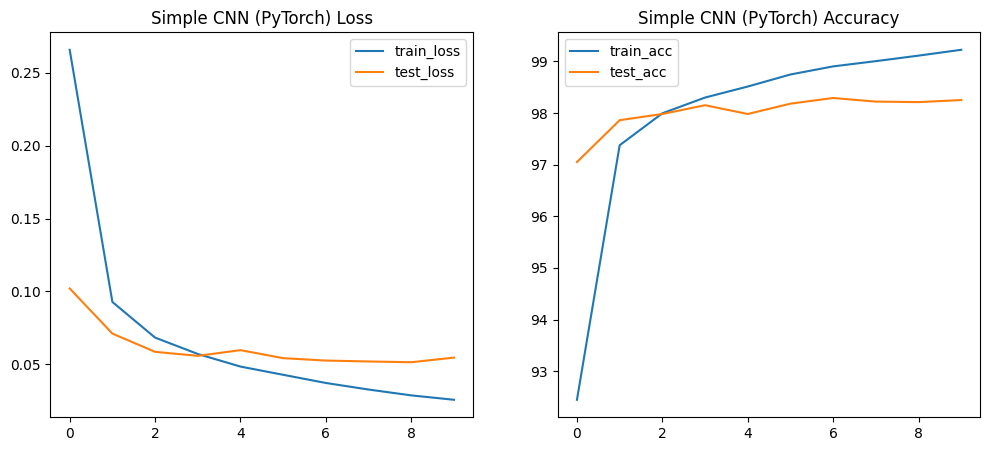

Epoch 1/10 | Train Acc: 88.11% | Test Acc: 96.74%
Epoch 2/10 | Train Acc: 96.85% | Test Acc: 97.84%
Epoch 3/10 | Train Acc: 97.75% | Test Acc: 98.45%
Epoch 4/10 | Train Acc: 98.32% | Test Acc: 98.70%
Epoch 5/10 | Train Acc: 98.52% | Test Acc: 98.87%
Epoch 6/10 | Train Acc: 98.76% | Test Acc: 98.78%
Epoch 7/10 | Train Acc: 98.94% | Test Acc: 98.55%
Epoch 8/10 | Train Acc: 99.04% | Test Acc: 98.88%
Epoch 9/10 | Train Acc: 99.11% | Test Acc: 98.76%
Epoch 10/10 | Train Acc: 99.21% | Test Acc: 99.00%


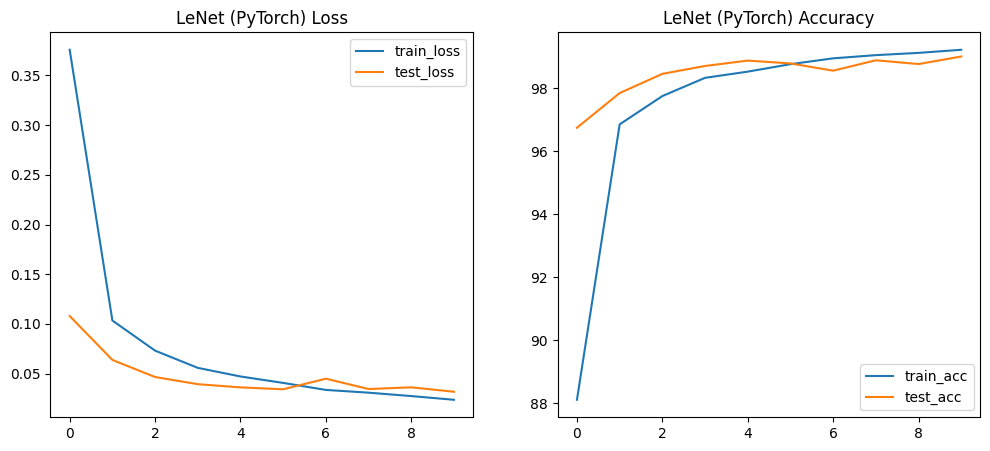

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Data loading & preprocessing
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =====================
#  Model 1: Simple CNN
# =====================
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(32*13*13, 10)

    def forward(self, x):
        x = torch.relu(self.conv(x))
        x = self.pool(x)
        x = x.view(-1, 32*13*13)
        x = self.fc(x)
        return x

# =====================
#  Model 2: LeNet
# =====================
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool = nn.AvgPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16*5*5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# =====================
#  Training Loop
# =====================
def train_model(model, name, epochs=5):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, test_losses, train_acc, test_acc = [], [], [], []

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(trainloader))
        train_acc.append(100 * correct / total)

        # Test phase
        model.eval()
        test_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_losses.append(test_loss / len(testloader))
        test_acc.append(100 * correct / total)

        print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_acc[-1]:.2f}% | Test Acc: {test_acc[-1]:.2f}%")

    # Plot Loss and Accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='train_loss')
    plt.plot(test_losses, label='test_loss')
    plt.title(f"{name} Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train_acc')
    plt.plot(test_acc, label='test_acc')
    plt.title(f"{name} Accuracy")
    plt.legend()
    plt.show()

# Run training
train_model(SimpleCNN(), "Simple CNN (PyTorch)", epochs=10)
train_model(LeNet(), "LeNet (PyTorch)", epochs=10)

# Lab Assignment - 6

Train the following Recurrent Neural Networks for the MNIST dataset (digits 0–1) using TensorFlow-Keras and PyTorch.
 Train the RNN model by passing the image as a one-dimensional array. Experiment with various learning rates and try to invoke the vanishing and exploding gradient problems
Train such that each row in the image is considered as an input sequence (sequence length = 28)
Train such that an entire image is considered as an input sequence (sequence length = 784)
Train an RNN for the Kaggle sunspot dataset. Try out various sequence lengths, such as bi-monthly, quarterly, yearly, and so on.
For each method and framework, plot loss and accuracy at the end. Train for a varying number of epochs.

## Tensorflow - Keras Implementation

In [ ]:
!pip install tensorflow

Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 32s 155ms/step - accuracy: 0.4896 - loss: 0.7715 - val_accuracy: 0.5366 - val_loss: 0.6907
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.5215 - loss: 0.6971 - val_accuracy: 0.4634 - val_loss: 0.7133
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 29s 147ms/step - accuracy: 0.4956 - loss: 0.7075 - val_accuracy: 0.5366 - val_loss: 0.7481
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.5047 - loss: 0.7026 - val_accuracy: 0.5366 - val_loss: 0.6937
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 25s 127ms/step - accuracy: 0.5137 - loss: 0.7118 - val_accuracy: 0.4634 - val_loss: 0.7191


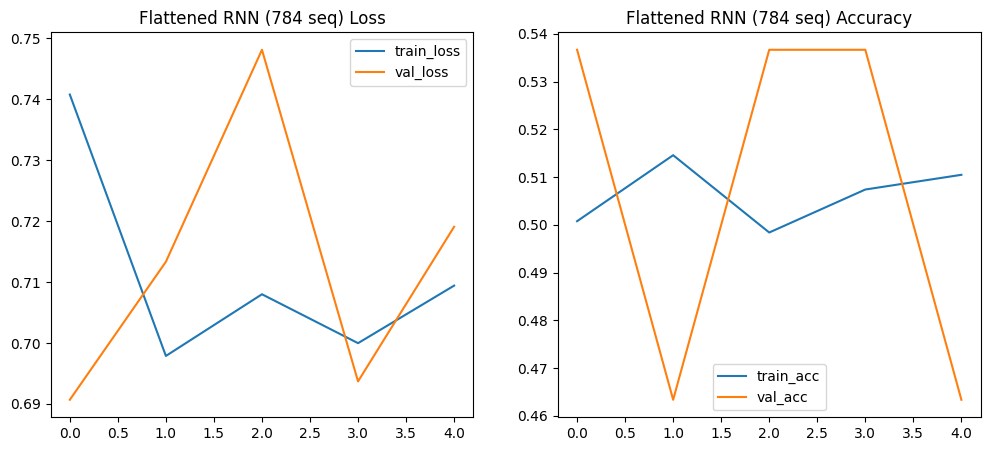

Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9772 - loss: 0.0743 - val_accuracy: 0.9986 - val_loss: 0.0046
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9969 - loss: 0.0111 - val_accuracy: 0.9920 - val_loss: 0.0274
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9971 - loss: 0.0102 - val_accuracy: 0.9986 - val_loss: 0.0067
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.9976 - val_loss: 0.0074
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9994 - loss: 0.0053 - val_accuracy: 0.9995 - val_loss: 0.0024


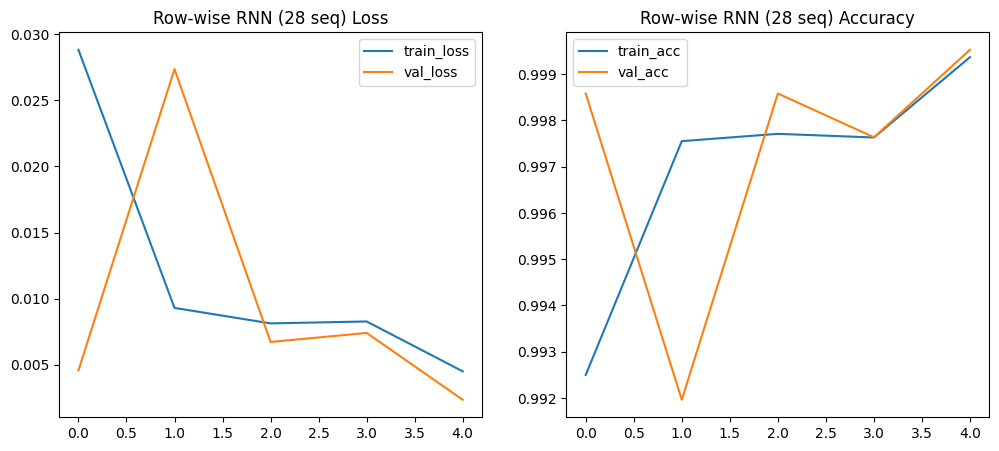

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST & keep only digits 0 and 1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

x_train, x_test = x_train / 255.0, x_test / 255.0

# -------------------------------
# 1. Image as 1D (flattened 784 sequence)
# -------------------------------
def rnn_flattened(lr=0.001):
    model = models.Sequential([
        layers.SimpleRNN(128, input_shape=(784,1), activation='tanh'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# -------------------------------
# 2. Row-wise (28 sequences of 28 pixels)
# -------------------------------
def rnn_rowwise(lr=0.001):
    model = models.Sequential([
        layers.SimpleRNN(128, input_shape=(28,28), activation='tanh'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Training helper
def train_and_plot(model, x_train, y_train, x_test, y_test, name, epochs=5):
    history = model.fit(x_train, y_train, epochs=epochs,
                        validation_data=(x_test, y_test), batch_size=64)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f"{name} Loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title(f"{name} Accuracy")
    plt.legend()
    plt.show()

# Reshape data for each experiment
x_train_flat = x_train.reshape(-1, 784, 1)
x_test_flat = x_test.reshape(-1, 784, 1)

x_train_row = x_train
x_test_row = x_test

# Run training
train_and_plot(rnn_flattened(lr=0.01), x_train_flat, y_train, x_test_flat, y_test, "Flattened RNN (784 seq)", epochs=5)
train_and_plot(rnn_rowwise(lr=0.001), x_train_row, y_train, x_test_row, y_test, "Row-wise RNN (28 seq)", epochs=5)


## Pytorch Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Prepare binary MNIST (0 vs 1)
train_mask = (y_train == 0) | (y_train == 1)
test_mask = (y_test == 0) | (y_test == 1)

X_train_torch = torch.tensor(x_train[train_mask], dtype=torch.float32)
y_train_torch = torch.tensor(y_train[train_mask], dtype=torch.long)
X_test_torch = torch.tensor(x_test[test_mask], dtype=torch.float32)
y_test_torch = torch.tensor(y_test[test_mask], dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_torch, y_test_torch), batch_size=64)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------------
# 1. Flattened 784-sequence RNN
# -------------------------------
class RNN_Flatten(nn.Module):
    def __init__(self, hidden_size=128):
        super(RNN_Flatten, self).__init__()
        self.rnn = nn.RNN(1, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 2)

    def forward(self, x):
        x = x.view(-1, 784, 1) # flatten
        out, _ = self.rnn(x)
        return self.fc(out[:,-1,:])

# -------------------------------
# 2. Row-wise 28-sequence RNN
# -------------------------------
class RNN_Rowwise(nn.Module):
    def __init__(self, hidden_size=128):
        super(RNN_Rowwise, self).__init__()
        self.rnn = nn.RNN(28, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 2)

    def forward(self, x):
        out, _ = self.rnn(x)  # already (batch, 28, 28)
        return self.fc(out[:,-1,:])

# Training helper
def train_model(model, loader, test_loader, name, epochs=5, lr=0.001):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, test_losses, train_acc, test_acc = [], [], [], []

    for epoch in range(epochs):
        model.train()
        total, correct, loss_sum = 0, 0, 0
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            loss_sum += loss.item()
            _, pred = out.max(1)
            total += y.size(0)
            correct += pred.eq(y).sum().item()
        train_losses.append(loss_sum / len(loader))
        train_acc.append(correct / total)

        # Test
        model.eval()
        total, correct, loss_sum = 0, 0, 0
        with torch.no_grad():
            for x, y in test_loader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)
                loss_sum += loss.item()
                _, pred = out.max(1)
                total += y.size(0)
                correct += pred.eq(y).sum().item()
        test_losses.append(loss_sum / len(test_loader))
        test_acc.append(correct / total)

        print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_acc[-1]:.2f} | Test Acc: {test_acc[-1]:.2f}")

    # Plot
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label="train_loss")
    plt.plot(test_losses, label="test_loss")
    plt.title(f"{name} Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_acc, label="train_acc")
    plt.plot(test_acc, label="test_acc")
    plt.title(f"{name} Accuracy")
    plt.legend()
    plt.show()

# Run training
train_model(RNN_Flatten(), train_loader, test_loader, "RNN Flattened (PyTorch)", epochs=5, lr=0.01)
train_model(RNN_Rowwise(), train_loader, test_loader, "RNN Rowwise (PyTorch)", epochs=5, lr=0.001)

Epoch 1/5 | Train Acc: 0.51 | Test Acc: 0.54
Epoch 2/5 | Train Acc: 0.50 | Test Acc: 0.54


## Tensorflow : Sunspot Dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load sunspot dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
df = pd.read_csv(url, usecols=[1])  # monthly sunspot counts
values = df.values.astype("float32")

# Normalize
scaler = MinMaxScaler()
values = scaler.fit_transform(values)

# Create sequences
def create_dataset(data, seq_length=12):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # e.g., bi-monthly (24 months)
X, y = create_dataset(values, seq_length)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# RNN model
model = models.Sequential([
    layers.SimpleRNN(50, activation='tanh', input_shape=(seq_length,1)),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title("Sunspot RNN Loss")
plt.legend()
plt.show()


# Lab Assignment - 7

Train the AlexNet for the MNIST dataset (digits 0–9) and the CIFAR-10 dataset using PyTorch. Plot the loss and accuracy. Tabulate and compare the performance of AlexNet on the MNIST dataset with the performance you got for the previous lab exercises.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# -------------------------------
# AlexNet Implementation
# -------------------------------
class AlexNet(nn.Module):
    def __init__(self, num_classes=10, in_channels=3):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256*3*3, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [ ]:
# CIFAR-10 (RGB)
transform_cifar = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_cifar)
cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_cifar)

# MNIST (grayscale → 1 channel, upscaled to 32x32)
transform_mnist = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform_mnist)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_mnist)

# Dataloaders
trainloader_cifar = torch.utils.data.DataLoader(cifar_train, batch_size=64, shuffle=True)
testloader_cifar = torch.utils.data.DataLoader(cifar_test, batch_size=64, shuffle=False)

trainloader_mnist = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
testloader_mnist = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [00:05<00:00, 29.5MB/s]
100%|██████████| 9.91M/9.91M [00:00<00:00, 34.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.06MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.56MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 14.0MB/s]


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, trainloader, testloader, name, epochs=5, lr=0.001):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, test_losses, train_acc, test_acc = [], [], [], []

    for epoch in range(epochs):
        # Training
        model.train()
        correct, total, loss_sum = 0, 0, 0
        for x, y in trainloader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            loss_sum += loss.item()
            _, pred = out.max(1)
            correct += pred.eq(y).sum().item()
            total += y.size(0)
        train_losses.append(loss_sum/len(trainloader))
        train_acc.append(correct/total)

        # Testing
        model.eval()
        correct, total, loss_sum = 0, 0, 0
        with torch.no_grad():
            for x, y in testloader:
                x, y = x.to(device), y.to(device)
                out = model(x)
                loss = criterion(out, y)
                loss_sum += loss.item()
                _, pred = out.max(1)
                correct += pred.eq(y).sum().item()
                total += y.size(0)
        test_losses.append(loss_sum/len(testloader))
        test_acc.append(correct/total)

        print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_acc[-1]*100:.2f}% | Test Acc: {test_acc[-1]*100:.2f}%")

    # Plot Loss/Accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(train_losses, label="train_loss")
    plt.plot(test_losses, label="test_loss")
    plt.title(f"{name} Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_acc, label="train_acc")
    plt.plot(test_acc, label="test_acc")
    plt.title(f"{name} Accuracy")
    plt.legend()
    plt.show()

    return max(test_acc)


In [ ]:
# MNIST (grayscale = 1 channel)
alexnet_mnist = AlexNet(num_classes=10, in_channels=1)
acc_mnist = train_model(alexnet_mnist, trainloader_mnist, testloader_mnist, "AlexNet on MNIST", epochs=5)

# CIFAR-10 (RGB = 3 channels)
alexnet_cifar = AlexNet(num_classes=10, in_channels=3)
acc_cifar = train_model(alexnet_cifar, trainloader_cifar, testloader_cifar, "AlexNet on CIFAR-10", epochs=10)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x4096 and 2304x4096)

# Lab Assignment - 8

Train the VGGNet with and without transfer learning on the MNIST dataset (digits 0–9) using Keras and PyTorch. Plot the loss and accuracy. Tabulate and compare the performance of VGGNet on the MNIST dataset with the performance you got for the previous lab exercises. Make a comparison between with and without transfer learning. Use imagenet weights when using transfer learning.

## Tensorflow-Keras Implementation

In [ ]:
# vggnet_mnist_keras.py
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np

# 1. Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Convert to 3 channels (VGG expects 3)
x_train = np.repeat(x_train[..., np.newaxis], 3, axis=-1)
x_test = np.repeat(x_test[..., np.newaxis], 3, axis=-1)

# Resize to 224x224 (VGG16 input)
x_train = tf.image.resize(x_train, [224, 224]).numpy()
x_test = tf.image.resize(x_test, [224, 224]).numpy()

x_train, x_test = x_train / 255.0, x_test / 255.0

# ----------------------------
# Function to build model
# ----------------------------
def build_vggnet(transfer_learning=True):
    if transfer_learning:
        base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
        for layer in base_model.layers:
            layer.trainable = False  # Freeze base layers
    else:
        base_model = VGG16(include_top=False, weights=None, input_shape=(224,224,3))

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ----------------------------
# Train models
# ----------------------------
history_scratch = build_vggnet(False).fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    batch_size=64,
    verbose=1
)

history_tl = build_vggnet(True).fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    batch_size=64,
    verbose=1
)

# ----------------------------
# Plot accuracy & loss
# ----------------------------
def plot_history(history, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

plot_history(history_scratch, "VGGNet (From Scratch)")
plot_history(history_tl, "VGGNet (Transfer Learning)")

# ----------------------------
# Final evaluation
# ----------------------------
test_loss_s, test_acc_s = history_scratch.model.evaluate(x_test, y_test, verbose=0)
test_loss_tl, test_acc_tl = history_tl.model.evaluate(x_test, y_test, verbose=0)

print("\n📊 Comparison Table (Keras):")
print(f"{'Model':30s}{'Test Accuracy':15s}{'Test Loss':15s}")
print(f"{'VGGNet (Scratch)':30s}{test_acc_s:.4f}{test_loss_s:.4f}")
print(f"{'VGGNet (Transfer Learning)':30s}{test_acc_tl:.4f}{test_loss_tl:.4f}")

## PyTorch Implementation

In [ ]:
# vggnet_mnist_pytorch.py
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ----------------------------
# 1. Data Loading
# ----------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ----------------------------
# Build VGG Model
# ----------------------------
def build_vggnet(transfer_learning=True):
    model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if transfer_learning else None)
    for param in model.features.parameters():
        param.requires_grad = not transfer_learning
    model.classifier[6] = nn.Linear(4096, 10)
    return model.to(device)

# ----------------------------
# Train Function
# ----------------------------
def train_model(model, epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)
    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == y).sum().item()
            total += y.size(0)
        train_accs.append(correct/total)
        train_losses.append(running_loss/len(train_loader))

        # validation
        model.eval()
        correct, total, val_loss = 0, 0, 0
        with torch.no_grad():
            for x, y in test_loader:
                x, y = x.to(device), y.to(device)
                outputs = model(x)
                loss = criterion(outputs, y)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == y).sum().item()
                total += y.size(0)
        val_accs.append(correct/total)
        val_losses.append(val_loss/len(test_loader))
        print(f"Epoch [{epoch+1}/{epochs}] - Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

    return train_losses, val_losses, train_accs, val_accs

# ----------------------------
# Run Experiments
# ----------------------------
model_scratch = build_vggnet(False)
tloss_s, vloss_s, tacc_s, vacc_s = train_model(model_scratch)

model_tl = build_vggnet(True)
tloss_tl, vloss_tl, tacc_tl, vacc_tl = train_model(model_tl)

# ----------------------------
# Plot
# ----------------------------
def plot_curves(train_acc, val_acc, train_loss, val_loss, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(train_acc, label='Train Acc')
    plt.plot(val_acc, label='Val Acc')
    plt.legend(); plt.title(f'{title} Accuracy')

    plt.subplot(1,2,2)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.legend(); plt.title(f'{title} Loss')
    plt.show()

plot_curves(tacc_s, vacc_s, tloss_s, vloss_s, "VGGNet (Scratch)")
plot_curves(tacc_tl, vacc_tl, tloss_tl, vloss_tl, "VGGNet (Transfer Learning)")
